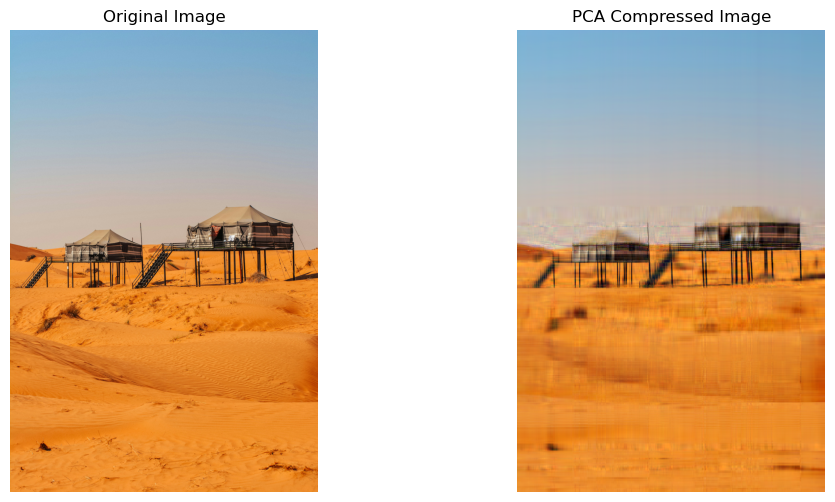

,Property,Original Image,PCA Compressed Data (R + G + B)
0,"Shape (Height, Width, Channels)","(6000, 4000, 3)","(6000, 15) per channel"
1,Total Elements,"72,000,000","270,000"
2,Data Type,uint8,uint8
3,Memory (Bytes),"72,000,000 B","2,160,000 B"
4,Memory (KB),70312.50 KB,2109.38 KB
5,Memory (MB),68.66 MB,2.06 MB


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
import pandas as pd
from tabulate import tabulate
from IPython.display import display

# Load the image
image = Image.open("pca.jpg")
image_array = np.array(image)

# Convert to RGB and split channels
image_convert = image.convert("RGB")
R, G, B = image_convert.split()
R = np.array(R)
G = np.array(G)
B = np.array(B)

# Apply PCA with optimized settings
n_components = 15  # Adjust for compression

def apply_pca(image_channel, n_components):
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(image_channel)  # Compressed representation
    reconstructed = pca.inverse_transform(transformed)  # Reconstruct image
    return np.clip(reconstructed, 0, 255).astype(np.uint8), transformed, pca

R_pca, R_transformed, pca_R = apply_pca(R, n_components)
G_pca, G_transformed, pca_G = apply_pca(G, n_components)
B_pca, B_transformed, pca_B = apply_pca(B, n_components)

# Reconstruct and stack channels
compressed_image = np.stack([R_pca, G_pca, B_pca], axis=-1)

# Compare images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_array)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(compressed_image)
axes[1].set_title("PCA Compressed Image")
axes[1].axis("off")
plt.show()

# Extract original image properties
original_shape = image_array.shape
original_pixels = image_array.size
original_dtype = image_array.dtype
original_memory = image_array.nbytes

# Calculate PCA memory usage (Only storing transformed matrices)
def calculate_pca_memory(pca_data):
    return pca_data.nbytes, pca_data.nbytes / 1024, pca_data.nbytes / (1024 * 1024)

R_pca_memory = calculate_pca_memory(R_transformed)
G_pca_memory = calculate_pca_memory(G_transformed)
B_pca_memory = calculate_pca_memory(B_transformed)
pca_total_memory = R_pca_memory[0] + G_pca_memory[0] + B_pca_memory[0]

# Create the comparison table with fancier styling
pca_shape = f"({R_transformed.shape[0]}, {n_components}) per channel"

# Prepare the comparison data
comparison_data = {
    "Property": [
        "Shape (Height, Width, Channels)",
        "Total Elements",
        "Data Type",
        "Memory (Bytes)",
        "Memory (KB)",
        "Memory (MB)"
    ],
    "Original Image": [
        original_shape,
        f"{original_pixels:,}",
        original_dtype,
        f"{original_memory:,} B",
        f"{original_memory / 1024:.2f} KB",
        f"{original_memory / (1024*1024):.2f} MB"
    ],
    "PCA Compressed Data (R + G + B)": [
        pca_shape,
        f"{R_transformed.size + G_transformed.size + B_transformed.size:,}",
        "uint8",  # PCA stores in float64
        f"{pca_total_memory:,} B",
        f"{pca_total_memory / 1024:.2f} KB",
        f"{pca_total_memory / (1024*1024):.2f} MB"
    ]
}

# Create a pandas DataFrame for fancy formatting
df_comparison = pd.DataFrame(comparison_data)

# Styling the DataFrame for a fancier look
styled_table = df_comparison.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},  # Header styles
     {'selector': 'tbody td', 'props': [('background-color', '#f2f2f2'), ('color', '#333333')]},  # Table body styles
     {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},  # Alternating row colors
     {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},  # Alternating row colors
     {'selector': 'td', 'props': [('border', '1px solid #ddd'), ('padding', '8px')]},  # Adding border and padding
     {'selector': 'table', 'props': [('border-collapse', 'collapse')]}  # Collapse table borders
])

# Display the fancy table in Jupyter (this will automatically render the styled table)
display(styled_table)




